Wahlpflichtfach Künstliche Intelligenz II: Praktikum | [Startseite](index.ipynb) | [**<< 06 - Erstes Data Wrangling mit Pandas**](06%20-%20Erstes%20Data%20Wrangling%20mit%20Pandas.ipynb)

---

# 07 - Data Cleaning und Data Preparation

Data Cleaning und Data Preparation sind ein riesen Thema. Manche Leute behaupten, dass Data Scientists 80 % ihrer Zeit damit verbringen, ihre Daten zu bereinigen. Die Themen, die wir hier behandeln werden, sind 

* Umgang mit fehlenden Werten (Missing Values)
* Entfernen von Duplikaten
* Strukturierung von Daten
* Entfernen von Ausreißern (Outlier)
* Finden der richtigen Datentypen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
%matplotlib inline

# Fehlende Werte (Missing Values)

Ein Sentinelwert wird verwendet, um fehlende Werte für Zahlen darzustellen. Eine spezielle Kombination von Bits steht für "Keine Zahl" (NaN). Dies kann man sich als das numerische Äquivalent von "Keine" vorstellen. In Python ist `NaN` durch die Pakete `NumPy` und `Pandas` verfügbar. Seit Pandas Version 1.0 werden fehlende Werte durch ein spezielles Objekt dargestellt: `pd.NA`.

Das mag auf den ersten Blick seltsam erscheinen, beginnt aber Sinn zu machen, wenn wir über die Semantik von `NaN` oder allgemeiner `NA` als Platzhalter für einen Wert, der __N__ot **A**vailable ist, nachdenken. Da `NA` einfach einen beliebigen Wert repräsentiert, den wir nicht kennen, wäre es falsch zu sagen, dass ein Wert, den wir nicht kennen, gleich einem anderen Wert ist, den wir nicht kennen. Daher kann `NA` nicht wirklich gleich irgendetwas sein.

Um explizit auf `NA` zu testen, benötigen wir eine eigene Funktion, die von `pandas` bereitgestellt wird.

In [2]:
pd.isna(np.nan)

True

In [3]:
pd.isna(pd.NA)

True

In [4]:
pd.isna(42)

False

### Umgang mit fehlenden Werten

In [5]:
ebola = pd.read_csv('data/07/ebola_country_timeseries.csv')
ebola.head()

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289        2776.0            NaN            10030.0   
1    1/4/2015  288        2775.0            NaN             9780.0   
2    1/3/2015  287        2769.0         8166.0             9722.0   
3    1/2/2015  286           NaN         8157.0                NaN   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0             NaN              2977.0             NaN   
1         1781.0             NaN              2943.0             NaN   
2         1767.0          3496.0              2915.0             NaN   
3            NaN          3496.0                 NaN             NaN   
4         1739.0          3471.0              2827.0             NaN   

   Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  Deaths_Mali  
0             NaN                  NaN           NaN          NaN  
1             NaN                  NaN           NaN          NaN  
2             NaN                  NaN           NaN          NaN  
3             NaN                  NaN           NaN          NaN  
4             NaN                  NaN           NaN          NaN

In [6]:
ebola['Cases_Guinea'].value_counts(dropna=False).head()

NaN      29
86.0      3
495.0     2
112.0     2
390.0     2
Name: Cases_Guinea, dtype: int64

### Verwerfen

Der einfachste Weg, mit fehlenden Daten umzugehen, ist, sie einfach zu verwerfen. Dies kann jedoch zu einem immensen Datenverlust führen, je nachdem, wie die Daten organisiert sind.

In [7]:
ebola.dropna()

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
19  11/18/2014  241        2047.0         7082.0             6190.0   

    Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
19           20.0            1.0                 4.0          1.0         6.0   

    Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
19         1214.0          2963.0              1267.0             8.0   

    Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  Deaths_Mali  
19             0.0                  1.0           0.0          6.0

In [8]:
ebola.dropna(how='all')

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0      1/5/2015  289        2776.0            NaN            10030.0   
1      1/4/2015  288        2775.0            NaN             9780.0   
2      1/3/2015  287        2769.0         8166.0             9722.0   
3      1/2/2015  286           NaN         8157.0                NaN   
4    12/31/2014  284        2730.0         8115.0             9633.0   
..          ...  ...           ...            ...                ...   
117   3/27/2014    5         103.0            8.0                6.0   
118   3/26/2014    4          86.0            NaN                NaN   
119   3/25/2014    3          86.0            NaN                NaN   
120   3/24/2014    2          86.0            NaN                NaN   
121   3/22/2014    0          49.0            NaN                NaN   

     Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
0              NaN            NaN                 NaN          NaN   
1              NaN            NaN                 NaN          NaN   
2              NaN            NaN                 NaN          NaN   
3              NaN            NaN                 NaN          NaN   
4              NaN            NaN                 NaN          NaN   
..             ...            ...                 ...          ...   
117            NaN            NaN                 NaN          NaN   
118            NaN            NaN                 NaN          NaN   
119            NaN            NaN                 NaN          NaN   
120            NaN            NaN                 NaN          NaN   
121            NaN            NaN                 NaN          NaN   

     Cases_Mali  Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  \
0           NaN         1786.0             NaN              2977.0   
1           NaN         1781.0             NaN              2943.0   
2           NaN         1767.0          3496.0              2915.0   
3           NaN            NaN          3496.0                 NaN   
4           NaN         1739.0          3471.0              2827.0   
..          ...            ...             ...                 ...   
117         NaN           66.0             6.0                 5.0   
118         NaN           62.0             NaN                 NaN   
119         NaN           60.0             NaN                 NaN   
120         NaN           59.0             NaN                 NaN   
121         NaN           29.0             NaN                 NaN   

     Deaths_Nigeria  Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  \
0               NaN             NaN                  NaN           NaN   
1               NaN             NaN                  NaN           NaN   
2               NaN             NaN                  NaN           NaN   
3               NaN             NaN                  NaN           NaN   
4               NaN             NaN                  NaN           NaN   
..              ...             ...                  ...           ...   
117             NaN             NaN                  NaN           NaN   
118             NaN             NaN                  NaN           NaN   
119             NaN             NaN                  NaN           NaN   
120             NaN             NaN                  NaN           NaN   
121             NaN             NaN                  NaN           NaN   

     Deaths_Mali  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
117          NaN  
118          NaN  
119          NaN  
120          NaN  
121          NaN  

[122 rows x 18 columns]

### Auffüllen

Stattdessen können fehlende Werte aufgefüllt werden, damit der Rest der Daten brauchbar bleibt. Beachten Sie, dass dies immer Artefakte einführt.

Wir können mit einem konstanten Wert auffüllen.

In [9]:
ebola.fillna(0).head()

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289        2776.0            0.0            10030.0   
1    1/4/2015  288        2775.0            0.0             9780.0   
2    1/3/2015  287        2769.0         8166.0             9722.0   
3    1/2/2015  286           0.0         8157.0                0.0   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            0.0            0.0                 0.0          0.0         0.0   
1            0.0            0.0                 0.0          0.0         0.0   
2            0.0            0.0                 0.0          0.0         0.0   
3            0.0            0.0                 0.0          0.0         0.0   
4            0.0            0.0                 0.0          0.0         0.0   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0             0.0              2977.0             0.0   
1         1781.0             0.0              2943.0             0.0   
2         1767.0          3496.0              2915.0             0.0   
3            0.0          3496.0                 0.0             0.0   
4         1739.0          3471.0              2827.0             0.0   

   Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  Deaths_Mali  
0             0.0                  0.0           0.0          0.0  
1             0.0                  0.0           0.0          0.0  
2             0.0                  0.0           0.0          0.0  
3             0.0                  0.0           0.0          0.0  
4             0.0                  0.0           0.0          0.0

Oder verwenden Sie einige fortgeschrittenere Strategien zur Berechnung der Daten, z. B. die Berechnung eines Mittelwerts pro Spalte. Dies kann durch jede einfache Summenstatistik ersetzt werden.

In [10]:
ebola.mean()

/tmp/ipykernel_14463/1045330258.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ebola.mean()


Day                     144.778689
Cases_Guinea            911.064516
Cases_Liberia          2335.337349
Cases_SierraLeone      2427.367816
Cases_Nigeria            16.736842
Cases_Senegal             1.080000
Cases_UnitedStates        3.277778
Cases_Spain               1.000000
Cases_Mali                3.500000
Deaths_Guinea           563.239130
Deaths_Liberia         1101.209877
Deaths_SierraLeone      693.701149
Deaths_Nigeria            6.131579
Deaths_Senegal            0.000000
Deaths_UnitedStates       0.833333
Deaths_Spain              0.187500
Deaths_Mali               3.166667
dtype: float64

In [11]:
ebola.fillna(ebola.mean()).head()

/tmp/ipykernel_14463/508567858.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ebola.fillna(ebola.mean()).head()


Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289   2776.000000    2335.337349       10030.000000   
1    1/4/2015  288   2775.000000    2335.337349        9780.000000   
2    1/3/2015  287   2769.000000    8166.000000        9722.000000   
3    1/2/2015  286    911.064516    8157.000000        2427.367816   
4  12/31/2014  284   2730.000000    8115.000000        9633.000000   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0      16.736842           1.08            3.277778          1.0         3.5   
1      16.736842           1.08            3.277778          1.0         3.5   
2      16.736842           1.08            3.277778          1.0         3.5   
3      16.736842           1.08            3.277778          1.0         3.5   
4      16.736842           1.08            3.277778          1.0         3.5   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0     1786.00000     1101.209877         2977.000000        6.131579   
1     1781.00000     1101.209877         2943.000000        6.131579   
2     1767.00000     3496.000000         2915.000000        6.131579   
3      563.23913     3496.000000          693.701149        6.131579   
4     1739.00000     3471.000000         2827.000000        6.131579   

   Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  Deaths_Mali  
0             0.0             0.833333        0.1875     3.166667  
1             0.0             0.833333        0.1875     3.166667  
2             0.0             0.833333        0.1875     3.166667  
3             0.0             0.833333        0.1875     3.166667  
4             0.0             0.833333        0.1875     3.166667

Einige fortgeschrittenere Techniken, wie z. B. der Expectation Maximization (EM)-Algorithmus, existieren, sind aber nicht direkt in `pandas` implementiert. 

Beim Umgang mit fortlaufenden Daten kann es sinnvoll sein, fehlende Werte mit vorherigen oder nachfolgenden Werten aufzufüllen.

In [12]:
ebola.fillna(method='ffill').head()

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289        2776.0            NaN            10030.0   
1    1/4/2015  288        2775.0            NaN             9780.0   
2    1/3/2015  287        2769.0         8166.0             9722.0   
3    1/2/2015  286        2769.0         8157.0             9722.0   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0             NaN              2977.0             NaN   
1         1781.0             NaN              2943.0             NaN   
2         1767.0          3496.0              2915.0             NaN   
3         1767.0          3496.0              2915.0             NaN   
4         1739.0          3471.0              2827.0             NaN   

   Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  Deaths_Mali  
0             NaN                  NaN           NaN          NaN  
1             NaN                  NaN           NaN          NaN  
2             NaN                  NaN           NaN          NaN  
3             NaN                  NaN           NaN          NaN  
4             NaN                  NaN           NaN          NaN

In [13]:
ebola.fillna(method='bfill')

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0      1/5/2015  289        2776.0         8166.0            10030.0   
1      1/4/2015  288        2775.0         8166.0             9780.0   
2      1/3/2015  287        2769.0         8166.0             9722.0   
3      1/2/2015  286        2730.0         8157.0             9633.0   
4    12/31/2014  284        2730.0         8115.0             9633.0   
..          ...  ...           ...            ...                ...   
117   3/27/2014    5         103.0            8.0                6.0   
118   3/26/2014    4          86.0            NaN                NaN   
119   3/25/2014    3          86.0            NaN                NaN   
120   3/24/2014    2          86.0            NaN                NaN   
121   3/22/2014    0          49.0            NaN                NaN   

     Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
0             20.0            1.0                 4.0          1.0   
1             20.0            1.0                 4.0          1.0   
2             20.0            1.0                 4.0          1.0   
3             20.0            1.0                 4.0          1.0   
4             20.0            1.0                 4.0          1.0   
..             ...            ...                 ...          ...   
117            NaN            NaN                 NaN          NaN   
118            NaN            NaN                 NaN          NaN   
119            NaN            NaN                 NaN          NaN   
120            NaN            NaN                 NaN          NaN   
121            NaN            NaN                 NaN          NaN   

     Cases_Mali  Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  \
0           7.0         1786.0          3496.0              2977.0   
1           7.0         1781.0          3496.0              2943.0   
2           7.0         1767.0          3496.0              2915.0   
3           7.0         1739.0          3496.0              2827.0   
4           7.0         1739.0          3471.0              2827.0   
..          ...            ...             ...                 ...   
117         NaN           66.0             6.0                 5.0   
118         NaN           62.0             NaN                 NaN   
119         NaN           60.0             NaN                 NaN   
120         NaN           59.0             NaN                 NaN   
121         NaN           29.0             NaN                 NaN   

     Deaths_Nigeria  Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  \
0               8.0             0.0                  1.0           0.0   
1               8.0             0.0                  1.0           0.0   
2               8.0             0.0                  1.0           0.0   
3               8.0             0.0                  1.0           0.0   
4               8.0             0.0                  1.0           0.0   
..              ...             ...                  ...           ...   
117             NaN             NaN                  NaN           NaN   
118             NaN             NaN                  NaN           NaN   
119             NaN             NaN                  NaN           NaN   
120             NaN             NaN                  NaN           NaN   
121             NaN             NaN                  NaN           NaN   

     Deaths_Mali  
0            6.0  
1            6.0  
2            6.0  
3            6.0  
4            6.0  
..           ...  
117          NaN  
118          NaN  
119          NaN  
120          NaN  
121          NaN  

[122 rows x 18 columns]

#### Fortgeschrittenes Auffüllen

Pandas bietet auch erweiterte Methoden zum Auffüllen fehlender Werte. Die Funktion [interpolate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas-dataframe-interpolate) bietet verschiedene Möglichkeiten, die fehlenden Werte zu interpolieren.

In [14]:
ebola['Cases_Guinea'].head()

0    2776.0
1    2775.0
2    2769.0
3       NaN
4    2730.0
Name: Cases_Guinea, dtype: float64

In [15]:
ebola['Cases_Guinea'].interpolate(method='quadratic').head()

0    2776.000000
1    2775.000000
2    2769.000000
3    2753.419091
4    2730.000000
Name: Cases_Guinea, dtype: float64

### Berechnungen mit fehlenden Werten

Standardmäßig ist `NumPy` sehr streng bei Berechnungen mit `NA`-Werten. Jede Operation, die `NA` beinhaltet, wird `NA` ergeben. Das ist insofern korrekt, als dass der Endwert einer Operation wie `sum` nicht bekannt sein kann, wenn auch nur ein einziger Wert unbekannt ist.

In [16]:
np.nansum([1, 2, np.nan, 3])

6.0

Aus praktischer Sicht ist dies jedoch nicht sehr sinnvoll. Daher verfolgt pandas den Ansatz, `NA`s gnädig zu ignorieren.

In [17]:
ebola['Cases_Guinea'].sum()

84729.0

Dieses Verhalten kann auf Wunsch geändert werden.

In [18]:
ebola['Cases_Guinea'].sum(skipna=False)

nan

## Entfernen von Duplikaten

Duplikate können als Teil ungeordneter Daten entstehen. Es ist wichtig, sie richtig zu identifizieren und zu beseitigen, damit sie unsere Statistiken nicht beeinflussen.

In [19]:
df1 = pd.DataFrame({
    'a': [1, 1, 1, 2, 2, 2],
    'b': [10, 20, 30, 40, 50, 50],
})

df1

a   b
0  1  10
1  1  20
2  1  30
3  2  40
4  2  50
5  2  50

Prüfen, ob eine Zeile ein Duplikat ist.

In [21]:
df1.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

Verwerfen Sie die doppelten Zeilen.

In [22]:
df1.drop_duplicates()

a   b
0  1  10
1  1  20
2  1  30
3  2  40
4  2  50

Duplikatsuche auf eine Teilmenge der Spalten einschränken.

In [23]:
df1.duplicated(subset='a')

0    False
1     True
2     True
3    False
4     True
5     True
dtype: bool

In [24]:
df1.drop_duplicates(subset='a')

a   b
0  1  10
3  2  40

## Data Preparation: Daten mit Pandas analysieren

## Datentypen

### Finden der richtigen Datentypen

Daten können in verschiedenen Maßstäben ausgedrückt werden. Sie müssen sicherstellen, dass Sie das Maßniveau finden, das sowohl semantisch als auch rechnerisch sinnvoll ist.

Ein kurzer Abstecher zu den Maßstäben
1. **Nominale Ebene** <br/>
   Zahlen stellen nur Kategorien dar und nichts weiter. <br/>
   Z.B.: Geschlechter, Farben<br/>
   Es können berechnet werden: absolute und relative Häufigkeiten, Modus   
   
1. **Ordinalebene** <br/>
   Die Reihenfolge hat eine Bedeutung.<br/>
   Z.B.: Schulnoten, Musik-Charts, Antworten auf einer Likert-Skala<br/>
   Sie können zusätzlich berechnen: kumulative Häufigkeiten, Median, Quantile   
   
1. **Intervallniveau** <br/>
   Gleiche Intervalle sollen die gleiche Bedeutung haben.<br/>
   Z.B.: Temperatur in Celsius, (Intelligenz-)Tests<br/>
   Sie können zusätzlich berechnen: Mittelwert, Standardabweichung   

1. **Verhältnisebene**<br/>
   Verhältnisse vermitteln Bedeutung und es gibt einen bestimmten 0-Punkt.<br/>
   Z.B.: Masse, Größe, Zeit, Geschwindigkeit<br/>
   Sie können berechnen: Variationskoeffizient $c = \frac{s}{\bar X}$, d.h. eine normierte Standardabweichung 


### Kategorische Daten
https://pandas.pydata.org/pandas-docs/stable/categorical.html

Die Verwendung eines kategorischen D-Typs hat mehrere Vorteile

* es hält den Speicherverbrauch niedrig
* es macht die Daten für numerische Modellierungsalgorithmen nutzbar
* Es signalisiert den Bibliotheken, die auf Pandas aufbauen, wie die Daten zu behandeln sind.
* es macht die Absicht klar, dass nur bestimmte Werte in einer Spalte erlaubt sind und wie sie sich zueinander verhalten

Die folgende `Serie` könnte perfekt mit Kategorien anstelle von Strings dargestellt werden.

In [25]:
s = pd.Series(['a','b', 'b', 'a', 'c', 'c'])
s

0    a
1    b
2    b
3    a
4    c
5    c
dtype: object

In [26]:
print(f'The string series is {s.nbytes} bytes big.')

The string series is 48 bytes big.


Durch Angabe des `dtype` als "category" werden die Daten automatisch in eine kategoriale Skala umgewandelt.

In [27]:
s = pd.Series(['a','b', 'b', 'a', 'c', 'c'], dtype='category')
s

0    a
1    b
2    b
3    a
4    c
5    c
dtype: category
Categories (3, object): ['a', 'b', 'c']

In der Tat wird die `Serie` schon viel kleiner. Der Effekt wird bei größeren `Serien` stärker sein.

In [28]:
print(f'The categorical series is {s.nbytes} bytes big.')

The categorical series is 30 bytes big.


Kategoriale Daten werden unter der Haube mit numerischen Codes gespeichert, die den Kategorien zugeordnet sind.

In [29]:
s.cat.categories

Index(['a', 'b', 'c'], dtype='object')

In [30]:
s.cat.codes

0    0
1    1
2    1
3    0
4    2
5    2
dtype: int8

Die Verwendung von `dtype='category'` erzeugt standardmäßig ungeordnete Kategorien.

In [31]:
s.cat.ordered

False

Der Accessor `cat` erlaubt das Ändern, Umbenennen und Ordnen von Kategorien.

In [32]:
s.cat.categories

Index(['a', 'b', 'c'], dtype='object')

In [33]:
s.cat.rename_categories(['x', 'y', 'z'])

0    x
1    y
2    y
3    x
4    z
5    z
dtype: category
Categories (3, object): ['x', 'y', 'z']

Eine kategoriale Reihe kann auch aus `pd.Categorical` erstellt werden. Damit können Sie die Kategorien und die Reihenfolge explizit festlegen.

In [34]:
pd.Categorical(['a', 'b', 'c', 'a'], categories=['b', 'c'],ordered=False)

[NaN, 'b', 'c', NaN]
Categories (2, object): ['b', 'c']

Das `Categorical`-Objekt kann dann an den `Series`-Konstruktor übergeben werden, um eine echte `Series` zu erhalten.

In [36]:
cat_series = pd.Series(
    pd.Categorical(['a', 'b', 'c', 'a'], categories=['b', 'c', 'a'],
                         ordered=False)
)
cat_series

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['b', 'c', 'a']

### Geordnete Kategorien

Was bedeutet es, geordnete Kategorien zu haben?

In [37]:
cat_series2 = pd.Series(
    pd.Categorical(['c', 'a', 'c', 'b'], categories=['b', 'c', 'a'],
                         ordered=False)
)
cat_series2

0    c
1    a
2    c
3    b
dtype: category
Categories (3, object): ['b', 'c', 'a']

In [38]:
cat_series == cat_series2

0    False
1    False
2     True
3    False
dtype: bool

In [39]:
cat_series > cat_series2

TypeError: Unordered Categoricals can only compare equality or not

In [40]:
cat_series

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['b', 'c', 'a']

In [41]:
cat_series.mode()

0    a
dtype: category
Categories (3, object): ['b', 'c', 'a']

In [42]:
cat_series.max()

TypeError: Categorical is not ordered for operation max
you can use .as_ordered() to change the Categorical to an ordered one


Diese Semantik geht verloren, wenn Sie die atomaren Werte herausziehen. Nur die `Serie` ist kategorisch, nicht die einzelnen Einträge.

In [43]:
cat_series.iloc[0], type(cat_series.iloc[0])

('a', str)

In [44]:
cat_series.iloc[0] < cat_series.iloc[1]

True

Nun das Gleiche für eine **geordnete** kategoriale `Serie`.

In [45]:
cat_ordered_series = pd.Series(
    pd.Categorical(['a', 'b', 'c', 'a'], categories=['b', 'c', 'a', 'd'],
                         ordered=True)
)
cat_ordered_series

0    a
1    b
2    c
3    a
dtype: category
Categories (4, object): ['b' < 'c' < 'a' < 'd']

In [46]:
cat_ordered_series2 = pd.Series(
    pd.Categorical(['c', 'a', 'c', 'b'], categories=['b', 'c', 'a', 'd'],
                    ordered=True)
)
cat_ordered_series2

0    c
1    a
2    c
3    b
dtype: category
Categories (4, object): ['b' < 'c' < 'a' < 'd']

In [47]:
cat_ordered_series > cat_ordered_series2

0     True
1    False
2    False
3     True
dtype: bool

In [48]:
cat_ordered_series.max()

'a'

In [49]:
cat_ordered_series == cat_ordered_series2

0    False
1    False
2     True
3    False
dtype: bool

Der Median funktioniert nicht bei den kategorialen Reihen, kann aber mit den Codes berechnet werden.

In [50]:
cat_ordered_series

0    a
1    b
2    c
3    a
dtype: category
Categories (4, object): ['b' < 'c' < 'a' < 'd']

In [51]:
cat_ordered_series.median()

TypeError: 'Categorical' with dtype category does not support reduction 'median'

In [52]:
cat_ordered_series.cat.codes.median()

1.5

Wenn Sie vorhandene Daten in einen kategorischen Typ umwandeln und die Kategorien und die Reihenfolge angeben möchten, können Sie mit `pd.CategoricalDtype` einen eigenen kategorischen Datentyp erstellen. Es funktioniert auf die gleiche Weise wie `pd.Categorical`, nur dass Sie die Daten nicht übergeben. Der neu erstellte Datentyp kann dann in einem `astype()`-Cast verwendet werden.

In [53]:
series = pd.Series(['a', 'b', 'c', 'a'])
series

0    a
1    b
2    c
3    a
dtype: object

In [54]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['b', 'c', 'a'],
                             ordered=True)
cat_type

CategoricalDtype(categories=['b', 'c', 'a'], ordered=True)

In [55]:
series.astype(cat_type)

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['b' < 'c' < 'a']

Schauen wir uns nun einen Datensatz aus der realen Welt und einige Diskretisierungstechniken an. Der Titanic-Datensatz enthält Merkmale über Passagiere der tragischen Titanic-Reise. Eine übliche einführende Übung zum maschinellen Lernen ist die Vorhersage des Überlebens der Passagiere auf der Grundlage der Merkmale (siehe https://www.kaggle.com/c/titanic/data).

In [56]:
titanic = pd.read_csv('data/07/titanic.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [57]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Wir nehmen alle Spalten in die Beschreibung auf, da "Objekt"-Spalten anders beschrieben werden als "numerische" Spalten und standardmäßig von der Beschreibung ausgeschlossen sind.

In [58]:
titanic.describe(include='all')

PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000     891  891.000000      204   
unique         NaN         NaN         NaN     681         NaN      147   
top            NaN         NaN         NaN  347082         NaN  B96 B98   
freq           NaN         NaN         NaN       7         NaN        4   
mean     29.699118    0.523008    0.381594     NaN   32.204208      NaN   
std      14.526497    1.102743    0.806057     NaN   49.693429      NaN   
min       0.420000    0.000000    0.000000     NaN    0.000000      NaN   
25%      20.125000    0.000000    0.000000     NaN    7.910400      NaN   
50%      28.000000    0.000000    0.000000     NaN   14.454200      NaN   
75%      38.000000    1.000000    0.000000     NaN   31.000000      NaN   
max      80.000000    8.000000    6.000000     NaN  512.329200      NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

Erweitern wir den Einschiffungshafen um den vollständigen Namen, um die Dinge etwas lesbarer zu machen. Dazu verwenden wir eine einfache Zusammenführungsoperation (mehr dazu später).

In [59]:
embarked_map = pd.DataFrame({'Embarked': ['C', 'Q', 'S'],
                             'EmbarkedLong': ['Cherbourg', 'Queenstown', 'Southampton']})
embarked_map

Embarked EmbarkedLong
0        C    Cherbourg
1        Q   Queenstown
2        S  Southampton

In [60]:
titanic = titanic.merge(embarked_map).sort_values(by='PassengerId')
titanic.head()

PassengerId  Survived  Pclass  \
0              1         0       3   
644            2         1       1   
1              3         1       3   
2              4         1       1   
3              5         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
644  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
1                               Heikkinen, Miss. Laina  female  26.0      0   
2         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
3                             Allen, Mr. William Henry    male  35.0      0   

     Parch            Ticket     Fare Cabin Embarked EmbarkedLong  
0        0         A/5 21171   7.2500   NaN        S  Southampton  
644      0          PC 17599  71.2833   C85        C    Cherbourg  
1        0  STON/O2. 3101282   7.9250   NaN        S  Southampton  
2        0            113803  53.1000  C123        S  Southampton  
3        0            373450   8.0500   NaN        S  Southampton

In [62]:
titanic.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
EmbarkedLong     object
dtype: object

Da die Spalte "EmbarkedLong" nur drei unterschiedliche Werte hat, ist es sinnvoll, sie mit Kategorien darzustellen.

In [64]:
titanic['EmbarkedLong'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [66]:
titanic['EmbarkedLong'] = titanic['EmbarkedLong'].astype('category')
titanic['EmbarkedLong'].head()

0      Southampton
644      Cherbourg
1      Southampton
2      Southampton
3      Southampton
Name: EmbarkedLong, dtype: category
Categories (3, object): ['Cherbourg', 'Queenstown', 'Southampton']

In [67]:
titanic.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
EmbarkedLong    category
dtype: object

Die Beschreibung für eine kategorische Spalte ist die gleiche wie für eine `Objekt`-Spalte.

In [68]:
titanic['EmbarkedLong'].describe()

count             889
unique              3
top       Southampton
freq              644
Name: EmbarkedLong, dtype: object

## Diskretisieren kontinuierlicher Werte (Tiling)
Manchmal ist es sinnvoll, numerische in kategorische Daten umzuwandeln. Zum Beispiel spielt bei manchen Problemen das genaue Alter einer Person keine Rolle, sondern nur, ob die Person minderjährig ist oder nicht. Dieser Konvertierungsprozess wird Kacheln genannt.

https://pandas.pydata.org/pandas-docs/stable/basics.html#discretization-and-quantiling

In [69]:
titanic['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Mit `cut` können wir numerische Werte diskretisieren.

In [70]:
titanic['Age'].head(7)

0      22.0
644    38.0
1      26.0
2      35.0
3      35.0
812     NaN
4      54.0
Name: Age, dtype: float64

In [71]:
pd.cut(titanic['Age'], bins=3).head(7)

0        (0.34, 26.947]
644    (26.947, 53.473]
1        (0.34, 26.947]
2      (26.947, 53.473]
3      (26.947, 53.473]
812                 NaN
4        (53.473, 80.0]
Name: Age, dtype: category
Categories (3, interval[float64, right]): [(0.34, 26.947] < (26.947, 53.473] < (53.473, 80.0]]

Standardmäßig wird `cut()` die Daten in gleich große Intervalle aufteilen. Da dies nur selten sinnvoll ist, können wir die Bin-Kanten selbst festlegen.

In [72]:
pd.cut(titanic['Age'], bins=[0, 17, 67, 80], include_lowest=True).head(7)

0      (17.0, 67.0]
644    (17.0, 67.0]
1      (17.0, 67.0]
2      (17.0, 67.0]
3      (17.0, 67.0]
812             NaN
4      (17.0, 67.0]
Name: Age, dtype: category
Categories (3, interval[float64, right]): [(-0.001, 17.0] < (17.0, 67.0] < (67.0, 80.0]]

In [73]:
pd.cut(titanic['Age'], bins=[0, 17, 67, 80]).value_counts()

(17, 67]    592
(0, 17]     113
(67, 80]      7
Name: Age, dtype: int64

Wenn Sie die Bereichsgrenzen manuell einstellen, achten Sie darauf, dass Sie den gesamten Bereich abdecken, da Werte, die nicht in ein Intervall fallen, auf NA gesetzt werden.

In [74]:
pd.cut(titanic['Age'], 
       bins=[64, 66, 67, 80],
       labels=['child', 'grown-up', 'senior']).head(7)

0      NaN
644    NaN
1      NaN
2      NaN
3      NaN
812    NaN
4      NaN
Name: Age, dtype: category
Categories (3, object): ['child' < 'grown-up' < 'senior']

In [75]:
titanic['Age_coarse'] = pd.cut(titanic['Age'], bins=[0, 17, 67, 80], labels=['child', 'grown-up', 'senior'])
titanic['Age_coarse']

0      grown-up
644    grown-up
1      grown-up
2      grown-up
3      grown-up
         ...   
641    grown-up
642    grown-up
643         NaN
811    grown-up
888    grown-up
Name: Age_coarse, Length: 889, dtype: category
Categories (3, object): ['child' < 'grown-up' < 'senior']

Eine verwandte Funktion ist `qcut()`, die an Quantilen schneidet.

In [76]:
pd.qcut(titanic['Age'], 4).head()

0      (20.0, 28.0]
644    (28.0, 38.0]
1      (20.0, 28.0]
2      (28.0, 38.0]
3      (28.0, 38.0]
Name: Age, dtype: category
Categories (4, interval[float64, right]): [(0.419, 20.0] < (20.0, 28.0] < (28.0, 38.0] < (38.0, 80.0]]

### Konvertierung in numerische Daten

Manchmal werden numerische Daten irgendwie verdreht. pd.to_numeric" behandelt diese Fälle und wandelt alles automatisch in den entsprechenden Typ um.

In [77]:
numeric_data = pd.read_csv('data/07/numeric_data.csv')
numeric_data

A     B      C
0             1  10.0   54.8
1             5  45.0     NA
2  notavailable   7.0    3.7
3             8  48.0   96.0

In [74]:
numeric_data.dtypes

A     object
B    float64
C     object
dtype: object

In [75]:
numeric_data['C'].sum()

' 54.8 NA 3.7 96.0'

In [76]:
numeric_data['B'].astype('int')

0    10
1    45
2     7
3    48
Name: B, dtype: int64

In [77]:
numeric_data['A'].astype('float')

ValueError: could not convert string to float: 'notavailable'

In [78]:
pd.to_numeric(numeric_data['A'], errors='ignore')

0               1
1               5
2    notavailable
3               8
Name: A, dtype: object

In [79]:
pd.to_numeric(numeric_data['A'], errors='coerce')

0    1.0
1    5.0
2    NaN
3    8.0
Name: A, dtype: float64

In [80]:
pd.to_numeric(numeric_data['B'], errors='coerce')

0    10.0
1    45.0
2     7.0
3    48.0
Name: B, dtype: float64

In [81]:
pd.to_numeric(numeric_data['C'], errors='coerce')

0    54.8
1     NaN
2     3.7
3    96.0
Name: C, dtype: float64

`to_numeric()` funktioniert nur bei Serien, aber zum Glück können wir `apply()` verwenden!

In [82]:
numeric_data

A     B      C
0             1  10.0   54.8
1             5  45.0     NA
2  notavailable   7.0    3.7
3             8  48.0   96.0

In [83]:
numeric_data.apply(pd.to_numeric, errors='coerce').dtypes #keyword-arguments are passed to the respective function

A    float64
B    float64
C    float64
dtype: object

In [84]:
isinstance(np.nan, float)

True

## Plotten mit Pandas

Pandas bietet einige Plotting-Funktionen an, die auf den entsprechenden Funktionen von matplotlib aufbauen und diese Funktionen intern selbst aufrufen. Um deren Verhalten zu ändern, kann man ihnen eine Achse an ein matplotlib-Objekt übergeben: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

<AxesSubplot: >

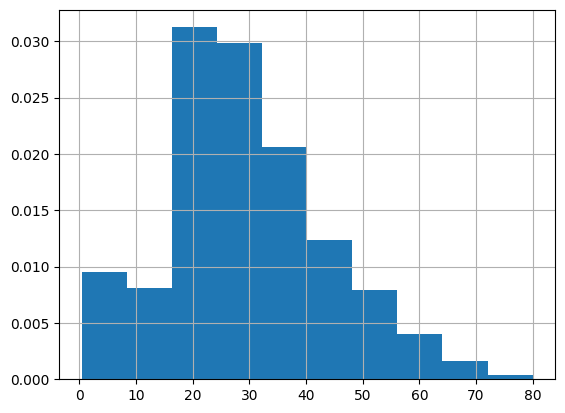

In [85]:
titanic['Age'].hist(density=True)

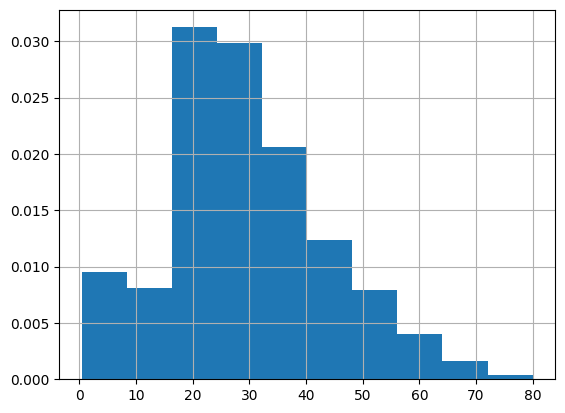

In [86]:
plt.hist(titanic['Age'].dropna().values, density=True)
plt.grid()

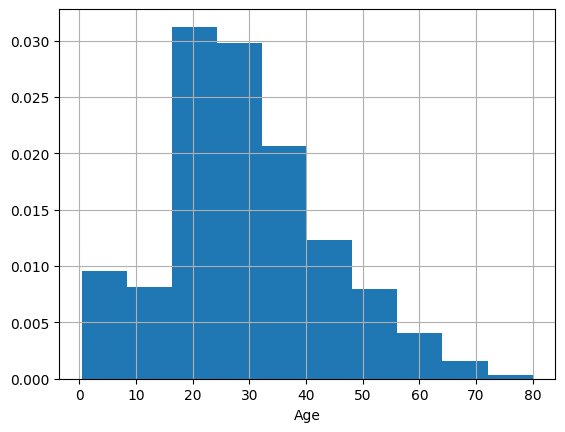

In [87]:
fig, ax = plt.subplots()
titanic['Age'].hist(density=True, ax=ax)
ax.set_xlabel('Age');

In [88]:
titanic['Age_coarse'].value_counts()

grown-up    592
child       113
senior        7
Name: Age_coarse, dtype: int64

<AxesSubplot: ylabel='Age_coarse'>

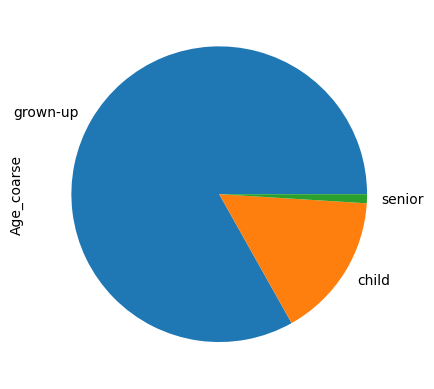

In [89]:
titanic['Age_coarse'].value_counts().plot(kind='pie')

In [90]:
coarse_age_series = titanic['Age_coarse'].cat.add_categories(['unknown'])
coarse_age_series

0      grown-up
644    grown-up
1      grown-up
2      grown-up
3      grown-up
         ...   
641    grown-up
642    grown-up
643         NaN
811    grown-up
888    grown-up
Name: Age_coarse, Length: 889, dtype: category
Categories (4, object): ['child' < 'grown-up' < 'senior' < 'unknown']

In [91]:
coarse_age_series.cat.categories

Index(['child', 'grown-up', 'senior', 'unknown'], dtype='object')

In [92]:
coarse_age_series = coarse_age_series.fillna('unknown')
coarse_age_series

0      grown-up
644    grown-up
1      grown-up
2      grown-up
3      grown-up
         ...   
641    grown-up
642    grown-up
643     unknown
811    grown-up
888    grown-up
Name: Age_coarse, Length: 889, dtype: category
Categories (4, object): ['child' < 'grown-up' < 'senior' < 'unknown']

In [93]:
coarse_age_series.value_counts()

grown-up    592
unknown     177
child       113
senior        7
Name: Age_coarse, dtype: int64

<AxesSubplot: ylabel='Age_coarse'>

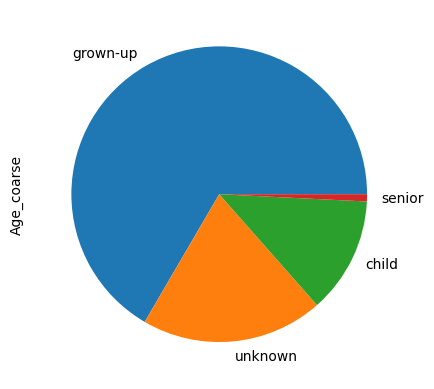

In [94]:
coarse_age_series.value_counts().plot(kind='pie')

<AxesSubplot: >

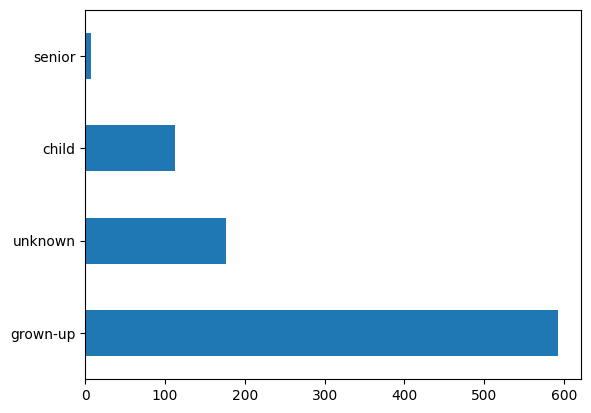

In [95]:
coarse_age_series.value_counts().plot(kind='barh')

Die Funktion `plot()` funktioniert auch mit DataFrames.

<AxesSubplot: xlabel='Age', ylabel='Fare'>

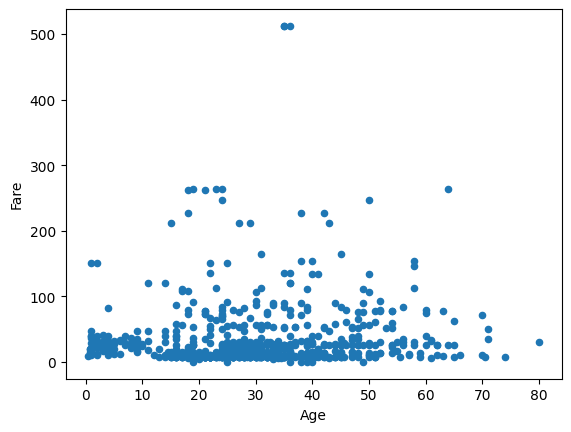

In [96]:
titanic[['Age', 'Fare']].plot(kind='scatter', x='Age', y='Fare')

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

## Mergen von DataFrames

Das Merging ist ein Konzept, das häufig in relationalen Datenbanken verwendet wird. Es erlaubt, mehrere Tabellen zu einer zusammenzufassen, indem die Spalten in Bezug auf die Werte in einer speziellen Schlüsselspalte verbunden werden. Es gibt verschiedene Möglichkeiten, wie dies erreicht werden kann.
![merging](images/07/merging.png)

Die Funktion `DataFrame.merge` bietet diese aus SQL (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas-dataframe-merge) entlehnten Funktionalitäten.

In [97]:
df1 = pd.DataFrame({'A': [1, 2, 3, 4],
                    'B': [0, np.pi, 2 * np.pi, 3 * np.pi],
                    'C': ['mouse', 'cat', 'dog', 'fish']})
df1

A         B      C
0  1  0.000000  mouse
1  2  3.141593    cat
2  3  6.283185    dog
3  4  9.424778   fish

In [98]:
df2 = pd.DataFrame({'C': ['mouse', 'horse', 'lizard', 'fish'],
                    'D': [1.0, 1.7, 3.0, 2.1],
                    'E': [1, np.e, np.e ** 2, np.e ** 3]})
df2

C    D          E
0   mouse  1.0   1.000000
1   horse  1.7   2.718282
2  lizard  3.0   7.389056
3    fish  2.1  20.085537

### Inner Join

Der innere Join nimmt die Schnittmenge der Schlüssel.

In [99]:
df1.merge(df2, how='inner')

A         B      C    D          E
0  1  0.000000  mouse  1.0   1.000000
1  4  9.424778   fish  2.1  20.085537

### Left Outer Join

Der Left Outer Join behält alle Werte aus der linken Tabelle (derjenigen, auf der merge aufgerufen wird) und verwendet `NaN`, wenn in der rechten Tabelle die entsprechenden Zeilen fehlen.

In [100]:
df1.merge(df2, how='left')

A         B      C    D          E
0  1  0.000000  mouse  1.0   1.000000
1  2  3.141593    cat  NaN        NaN
2  3  6.283185    dog  NaN        NaN
3  4  9.424778   fish  2.1  20.085537

### Right Outer Join
Der Right Outer Join funktioniert genauso wie der Left Outer Join, aber statt aller Schlüssel aus der linken Tabelle werden alle Schlüssel aus der rechten Tabelle verwendet.

In [101]:
df1.merge(df2, how='right')

A         B       C    D          E
0  1.0  0.000000   mouse  1.0   1.000000
1  NaN       NaN   horse  1.7   2.718282
2  NaN       NaN  lizard  3.0   7.389056
3  4.0  9.424778    fish  2.1  20.085537

### Outer Join
Die Outer Join verwendet alle Schlüssel, die sowohl in der linken als auch in der rechten Tabelle vorhanden sind. Fehlende Zeilen in einer der Tabellen werden mit `NaN` aufgefüllt.

In [102]:
df1.merge(df2, how='outer')

A         B       C    D          E
0  1.0  0.000000   mouse  1.0   1.000000
1  2.0  3.141593     cat  NaN        NaN
2  3.0  6.283185     dog  NaN        NaN
3  4.0  9.424778    fish  2.1  20.085537
4  NaN       NaN   horse  1.7   2.718282
5  NaN       NaN  lizard  3.0   7.389056

### Überlappende Spaltennamen

In [103]:
df2 = df2.rename(columns={'D': 'A'})
df2

C    A          E
0   mouse  1.0   1.000000
1   horse  1.7   2.718282
2  lizard  3.0   7.389056
3    fish  2.1  20.085537

In [104]:
df1

A         B      C
0  1  0.000000  mouse
1  2  3.141593    cat
2  3  6.283185    dog
3  4  9.424778   fish

Wenn es nicht implizit klar ist, auf welcher Spalte der Join stattfinden soll, müssen wir Pandas sagen, welche Spalte es verwenden soll. Es kann den Join auch auf mehreren Spalten durchführen, aber dafür müssen die dtypes der übereinstimmenden Spalten innerhalb der beiden DataFrames gleich sein.

In [105]:
df1.merge(df2, how='inner')

/tmp/ipykernel_14463/1206675343.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df1.merge(df2, how='inner')


A    B      C    E
0  1  0.0  mouse  1.0

Wir können Pandas mit dem Schlüsselwort-Argument `on` explizit mitteilen, auf welcher Spalte die Verknüpfung stattfinden soll. Mit dem Parameter `suffixes` können wir steuern, wie überlappende Spaltennamen im verbundenen DataFrame geändert werden sollen.

In [106]:
df1.merge(df2, how='inner', on='C', suffixes=('_from_df1', '_from_df2'))

A_from_df1         B      C  A_from_df2          E
0           1  0.000000  mouse         1.0   1.000000
1           4  9.424778   fish         2.1  20.085537

In [107]:
df1['A'] = df1['A'].astype(float)
df1.merge(df2, how='inner', on=['A', 'C'])

A    B      C    E
0  1.0  0.0  mouse  1.0

## Arbeiten mit Zeitreihendaten

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html  
Der grundlegendste Baustein von Zeitreihendaten in Pandas ist der `Timestamp`. Er repräsentiert einen Moment in der Zeit mit der Genauigkeit einer Nanosekunde. Er wird ergänzt durch `Timedelta`, das eine Zeitspanne wie "ein Monat" repräsentiert, ohne an ein Datum gebunden zu sein, und `Period`, das eine Kombination aus beiden ist, wie "Juni 2018". Dabei muss `Period` eine gewisse Regelmäßigkeit haben, wie z. B. jeden Monat.

### Timestamps (Zeitstempel)
Timestamps können einfach aus menschenlesbaren Strings mit `pd.datetime` erstellt werden.

In [108]:
pd.to_datetime('2020-06-09')

Timestamp('2020-06-09 00:00:00')

In [109]:
pd.to_datetime('9th June 20')

Timestamp('2020-06-09 00:00:00')

In [111]:
pd.to_datetime('06.09.2020')

Timestamp('2020-06-09 00:00:00')

Für Nicht-Amerikaner und Leute, die denken, dass der Tag vor dem Monat kommen sollte.

In [112]:
pd.to_datetime('09.06.2020', dayfirst=True)

Timestamp('2020-06-09 00:00:00')

In [113]:
pd.to_datetime('2020-06-09 14:45')

Timestamp('2020-06-09 14:45:00')

In [114]:
date = pd.to_datetime('2020-06-09 14:45:30.600700800')
date

Timestamp('2020-06-09 14:45:30.600700800')

`Timestamps` stellen alle Informationen über Attribute zur Verfügung.

In [115]:
date.year

2020

In [116]:
date.month

6

In [117]:
date.day

9

In [118]:
date.second

30

In [119]:
date.microsecond

600700

In [120]:
date.nanosecond

800

Timestamps können verglichen werden:

In [121]:
date1 = pd.to_datetime('2020-06-09 14:45')
date2 = pd.to_datetime('2020-06-09 14:46')
date1 < date2

True

Wenn eine Serie übergeben wird, gibt `to_datetime()` eine Serie (mit demselben Index) zurück, während eine Liste in einen DatetimeIndex umgewandelt wird:

In [122]:
pd.to_datetime(pd.Series(['Jul 31, 2009', '2010-01-10', None]))

0   2009-07-31
1   2010-01-10
2          NaT
dtype: datetime64[ns]

In [123]:
pd.to_datetime(['2005/11/23', '2010.12.31'])

DatetimeIndex(['2005-11-23', '2010-12-31'], dtype='datetime64[ns]', freq=None)

Timestamps" können mit einem speziellen Satz von Symbolen formatiert werden. Alle diese Symbole finden Sie hier https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [124]:
date.strftime('Today is a %A in %B')

'Today is a Tuesday in June'

In [125]:
pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')

Timestamp('2010-11-12 00:00:00')

### DatetimeIndex

Timestamps können zur Indizierung von Daten verwendet werden.

In [126]:
index = pd.DatetimeIndex(['2020-06-16', '2020-06-23',
                          '2020-06-30', '2020-07-07',
                          '2020-07-14'])
schedule = pd.Series(['Statistical Visualization', 'SciPy and Statistical Modeling I',
                      'Statistical Modeling II', 'Creating Experiments',
                      'Performance Optimization'], index=index)
schedule

2020-06-16           Statistical Visualization
2020-06-23    SciPy and Statistical Modeling I
2020-06-30             Statistical Modeling II
2020-07-07                Creating Experiments
2020-07-14            Performance Optimization
dtype: object

In [127]:
schedule['2020-06-10':'2020-06-30']

2020-06-16           Statistical Visualization
2020-06-23    SciPy and Statistical Modeling I
2020-06-30             Statistical Modeling II
dtype: object

So wie es NaN für Zahlen gibt, gibt es NaT (Not-A-Time) für Timestamps:

In [128]:
dt = pd.to_datetime(['2009/07/31', 'asd'], errors='coerce')
dt

DatetimeIndex(['2009-07-31', 'NaT'], dtype='datetime64[ns]', freq=None)

`isnull()` prüft auf fehlende Daten in DatetimeIndex-Objekten (NaN in numerischen Arrays, None oder NaN in Objekt-Arrays, NaT in datetimelike):

In [129]:
dt.isnull()

array([False,  True])

### Lesen von Zeitreihendaten

Lesen Sie die Daten, die im Format "Zeilen mit fester Breite" formatiert sind.

In [131]:
ts = pd.read_fwf('data/ao_monthly.txt', header=None, index_col=0)
ts.head()

1         2
0                
1950  1 -0.060310
1950  2  0.626810
1950  3 -0.008127
1950  4  0.555100
1950  5  0.071577

Dies erzeugt einen Integer-Index anstelle des gewünschten `DateTimeIndex`.

In [132]:
ts.index

Int64Index([1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
            ...
            2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name=0, length=798)

In [133]:
ts = pd.read_fwf('data/ao_monthly.txt', header=None, index_col=0,
                 parse_dates=[[0, 1]], infer_datetime_format=True)
ts.head()

2
0_1                 
1950-01-01 -0.060310
1950-02-01  0.626810
1950-03-01 -0.008127
1950-04-01  0.555100
1950-05-01  0.071577

In [135]:
ts.index

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01'],
              dtype='datetime64[ns]', name='0_1', length=798, freq=None)

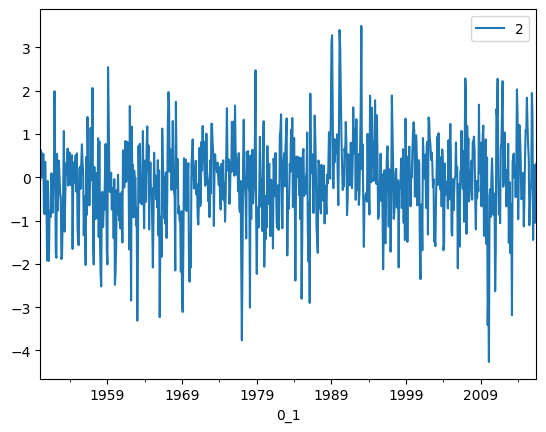

In [136]:
ts.plot();

Jetzt, da unsere Reihe durch Zeitstempel indiziert ist, können wir mit zeitbezogener Semantik aggregieren.

In [137]:
ts.index.year

Int64Index([1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
            ...
            2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='0_1', length=798)

In [138]:
ts.groupby(ts.index.year).mean().head()

2
0_1           
1950 -0.199501
1951 -0.364626
1952 -0.674990
1953 -0.016515
1954 -0.000770

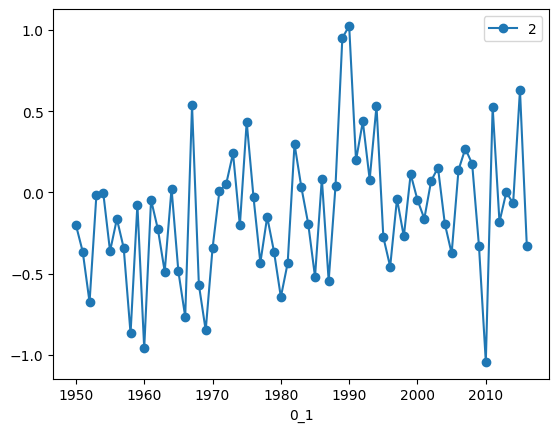

In [139]:
ts.groupby(ts.index.year).mean().plot(marker='o');

Mit `pd.Grouper()` können wir komplexere Gruppierungen festlegen.

In [141]:
ts.groupby(pd.Grouper(freq='5Y')).mean().head()

2
0_1                 
1950-12-31 -0.199501
1955-12-31 -0.283744
1960-12-31 -0.481644
1965-12-31 -0.243986
1970-12-31 -0.397825

In [142]:
ts.groupby(pd.Grouper(freq='d')).mean().head()

2
0_1                
1950-01-01 -0.06031
1950-01-02      NaN
1950-01-03      NaN
1950-01-04      NaN
1950-01-05      NaN

### Resampling (Neuabtastung)

Wenn Sie mit der Häufigkeit, mit der Ihre Daten abgetastet werden, nicht zufrieden sind, können Sie die Abtastfrequenz ändern.

In [147]:
nineteenfifty = ts['1950']
nineteenfifty.head()

/tmp/ipykernel_14463/3619878410.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  nineteenfifty = ts['1950']


2
0_1                 
1950-01-01 -0.060310
1950-02-01  0.626810
1950-03-01 -0.008127
1950-04-01  0.555100
1950-05-01  0.071577

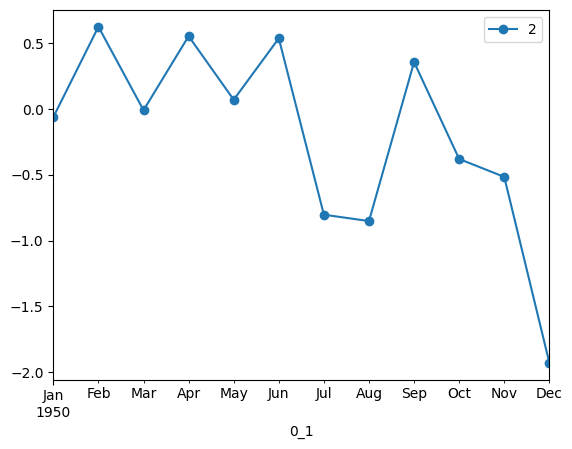

In [148]:
nineteenfifty.plot(marker='o');

In [149]:
nineteenfifty.asfreq('12D', method='ffill').head()

2
0_1                
1950-01-01 -0.06031
1950-01-13 -0.06031
1950-01-25 -0.06031
1950-02-06  0.62681
1950-02-18  0.62681

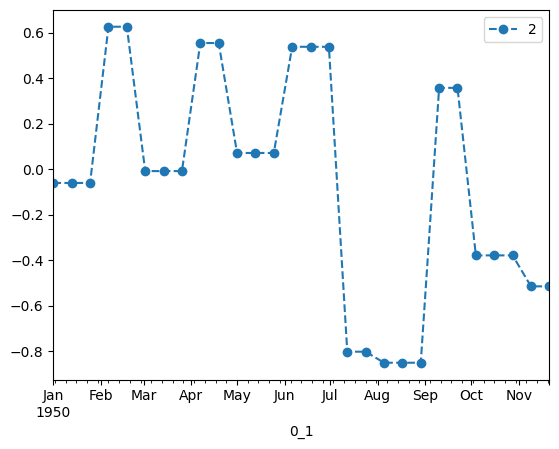

In [151]:
nineteenfifty.asfreq('12D', method='ffill').plot(style='--o');

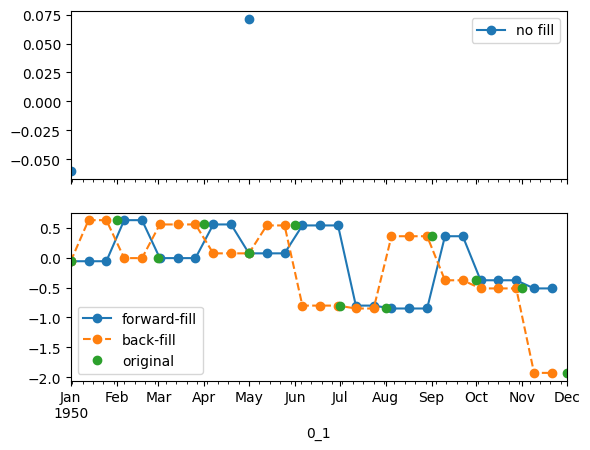

In [152]:
fig, ax = plt.subplots(nrows=2, sharex=True)

# row 1
nineteenfifty.asfreq('12D').plot(ax=ax[0], style='-o') # no fill
# row 2
nineteenfifty.asfreq('12D', method='ffill').plot(ax=ax[1], marker='o') # forward-fill
nineteenfifty.asfreq('12D', method='bfill').plot(ax=ax[1], style='--o') # back-fill
nineteenfifty.plot(ax=ax[1], style='o') # original

ax[0].legend(['no fill'])
ax[1].legend(['forward-fill', 'back-fill', 'original']);

Downsampling kann durch Angabe einer kleineren Frequenz erfolgen.

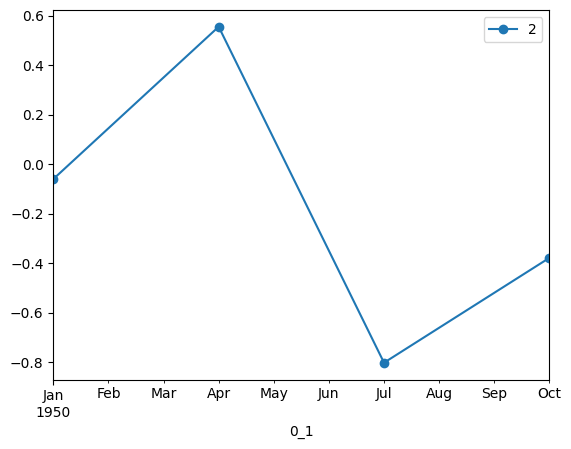

In [153]:
nineteenfifty.asfreq('3M', method='ffill').plot(marker='o');

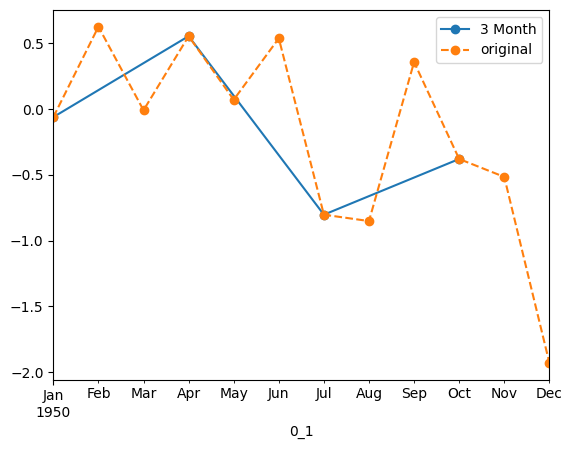

In [154]:
fig, ax = plt.subplots()

nineteenfifty.asfreq('3M', method='ffill').plot(marker='o', ax=ax) # downsampled
nineteenfifty.plot(ax=ax, style='--o') # original

ax.legend(['3 Month', 'original']);

Resampling kann auch mit Aggregation durch `resample()` kombiniert werden. Schauen wir uns einige Aktiendaten an, um dies zu veranschaulichen.

In [155]:
yahoo = pd.read_csv('data/07/yahoo_stock.csv', index_col=0, parse_dates=True)
yahoo.head()

Open   High    Low  Close  Adj Close    Volume
Date                                                       
2009-01-02  12.17  12.85  12.12  12.85      12.85   9514600
2009-01-05  12.72  13.01  12.39  12.86      12.86  11989900
2009-01-06  12.96  13.24  12.88  13.00      13.00  10056000
2009-01-07  12.71  13.16  12.45  12.71      12.71  24995900
2009-01-08  12.37  13.07  12.31  13.07      13.07  14355000

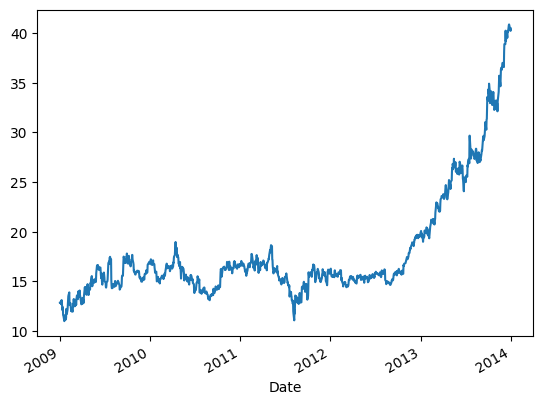

In [157]:
ts = yahoo['Close']
ts.plot();

http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

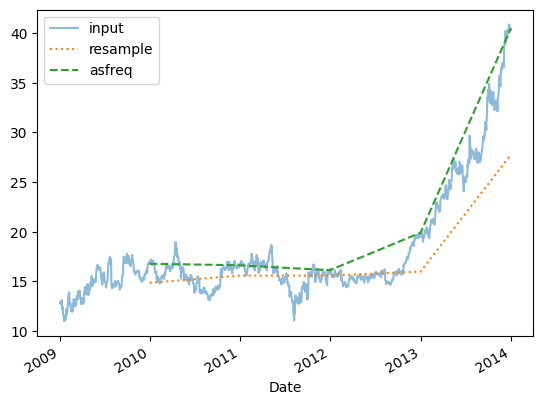

In [159]:
ts.plot(alpha=0.5, style='-')
ts.resample('BA').mean().plot(style=':')
ts.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

### Verschieben und Differenzieren

In [160]:
ts_resampled = ts.asfreq('D', method='ffill')

Das Verschieben von Daten in der Zeit kann auf zwei Arten erfolgen. Mit "Shift" werden die Daten tatsächlich verschoben. Dabei entstehen auf der einen Seite fehlende Werte und auf der anderen Seite gehen Daten verloren. Im Gegensatz dazu verschiebt `tshift` nur den Zeitindex der Daten und nicht die Daten selbst.

/tmp/ipykernel_14463/2525109879.py:5: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ts_resampled.tshift(365).plot(ax=axes[2], title='tshift(365)')


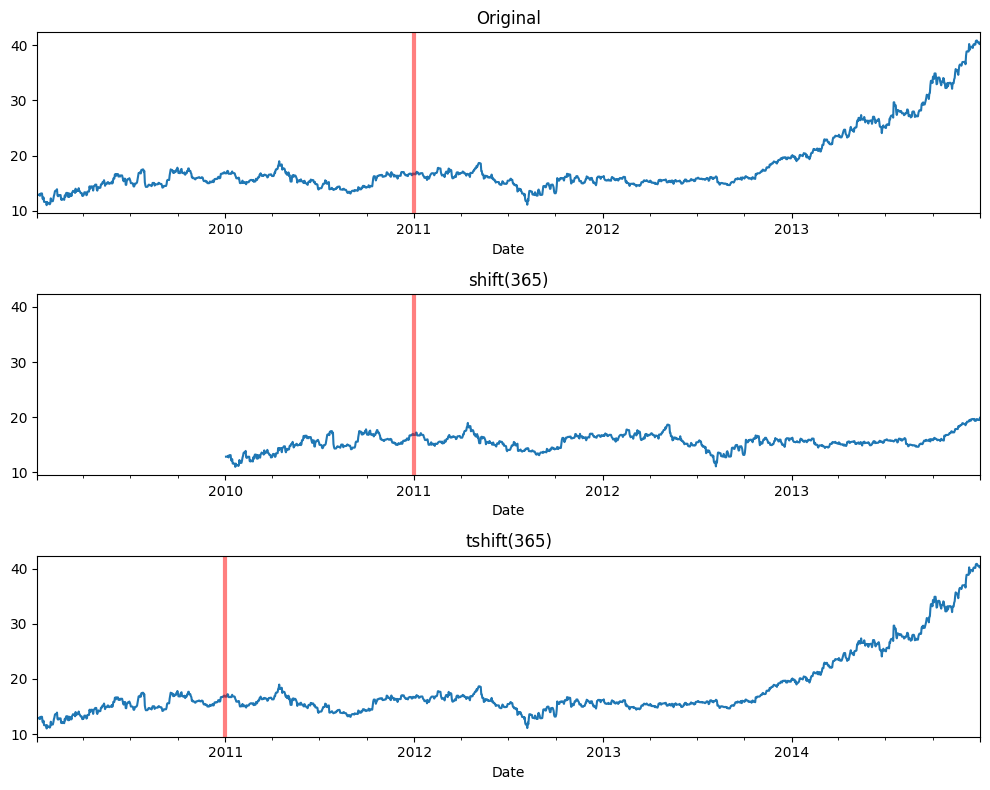

In [161]:
fig, axes = plt.subplots(nrows=3, sharey=True, figsize=(10, 8))

ts_resampled.plot(ax=axes[0], title='Original')
ts_resampled.shift(365).plot(ax=axes[1], title='shift(365)')
ts_resampled.tshift(365).plot(ax=axes[2], title='tshift(365)')

axes[0].axvline('2011', alpha=0.5, color='r', linewidth=3)
axes[1].axvline('2011', alpha=0.5, color='r', linewidth=3)
axes[2].axvline('2011', alpha=0.5, color='r', linewidth=3)

plt.tight_layout()

Die Verschiebung ist nützlich für Berechnungen, die Werte über Zeitschritte hinweg vergleichen. Ein Beispiel ist das Differenzieren, um den Trend in der Zeitreihe zu entfernen.

<AxesSubplot: xlabel='Date'>

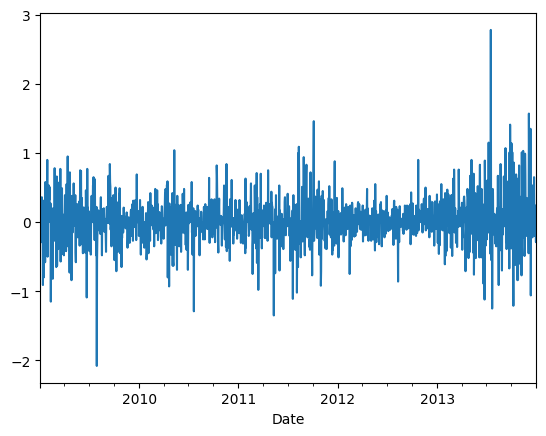

In [162]:
(ts_resampled - ts_resampled.shift(periods=1)).plot()

Für die Differenzierung stellt Pandas die komfortable Methode `diff` zur Verfügung.

<AxesSubplot: xlabel='Date'>

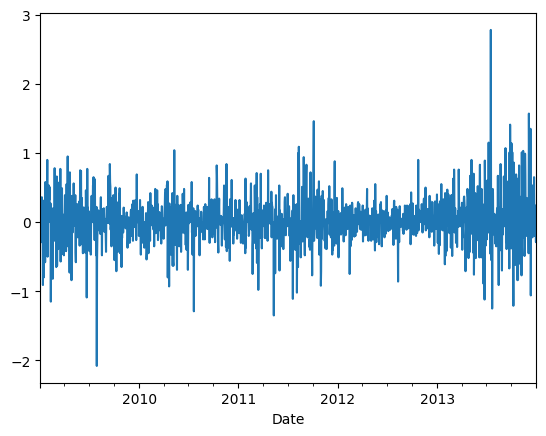

In [164]:
ts_resampled.diff(periods=1).plot()

### Window-Funktionen

Window-Funktionen sind ähnlich wie `groupby`, da sie die Daten in verschiedene Gruppen basierend auf einem sich ändernden Fenster aufteilen. Die Punkte in jedem Fenster werden mithilfe einer zusammenfassenden Statistik aggregiert und dann wieder zu einer Zeitreihe kombiniert.

#### Rollendes Window

Ein rollendes Window ist das Standardbeispiel für eine Window-Funktion. Es verschiebt ein Fenster mit fester Größe über die Zeitreihe.

<AxesSubplot: xlabel='Date'>

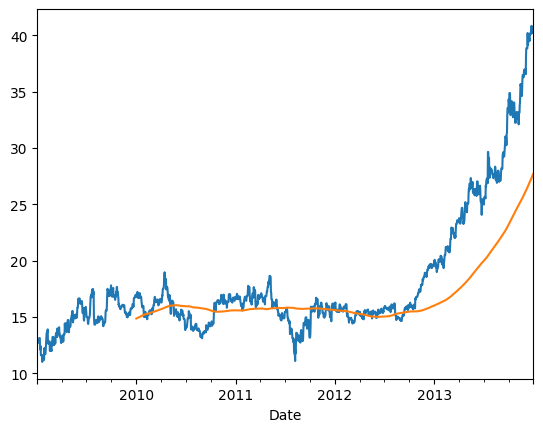

In [166]:
ts_resampled.plot()
ts_resampled.rolling(365).mean().plot()

Wenn Sie `center=True` einstellen, wird der Punkt, der aggregiert und in die neue Serie eingefügt wird, aus der Mitte des Fensters und nicht von seinem Ende aus stammen. 

<AxesSubplot: xlabel='Date'>

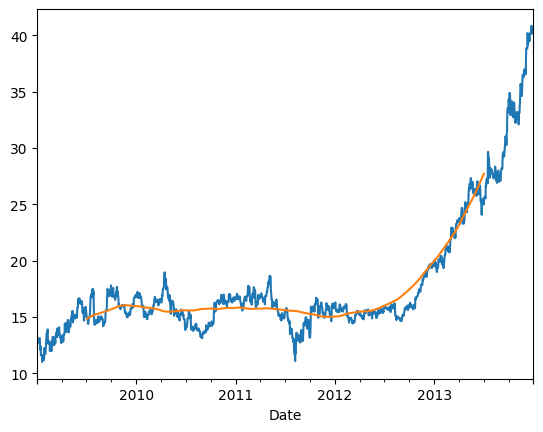

In [167]:
ts_resampled.plot()
ts_resampled.rolling(365, center=True).mean().plot()

### Expandierendes Window

Ein expandierendes Window hat nur eine minimale Größe. Dann wird es mit jedem Schritt größer, wobei alle vorherigen Werte berücksichtigt werden. Dies ist sinnvoll, wenn Ihre Zeitreihe einen stationären Wert misst, der nur um einen Mittelwert schwankt.

<AxesSubplot: xlabel='Date'>

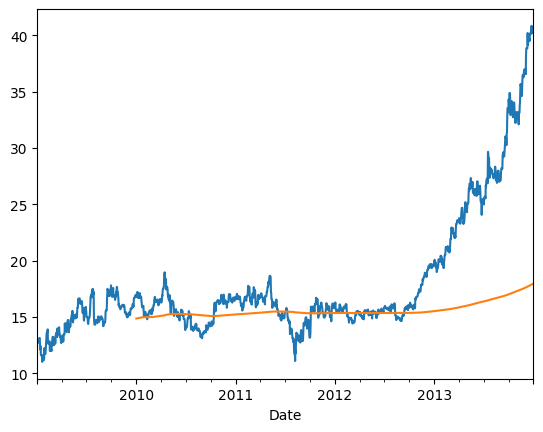

In [168]:
ts_resampled.plot()
ts_resampled.expanding(min_periods=365).mean().plot()

### Exponential gewichtete Window

Ein exponentiell gewichtetes Window funktioniert wie ein expandierendes Fenster, gibt aber neueren Datenpunkten eine exponentiell höhere Gewichtung in allen Berechnungen. Es kann also als eine glatte Version eines rollenden Window betrachtet werden.

<AxesSubplot: xlabel='Date'>

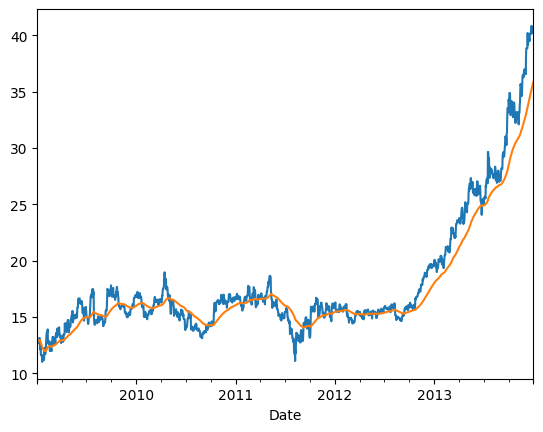

In [169]:
ts_resampled.plot()
ts_resampled.ewm(com=50.5, min_periods=5).mean().plot()

### Timedeltas und Perioden

Timedeltas können zu Timestamps hinzugefügt werden.

In [178]:
delta = pd.to_timedelta('1 day')
delta

Timedelta('1 days 00:00:00')

In [179]:
schedule

2024-01-16           Statistical Visualization
2024-01-23    SciPy and Statistical Modeling I
2024-01-30             Statistical Modeling II
2024-02-06                Creating Experiments
2024-02-13            Performance Optimization
dtype: object

In [180]:
schedule.index += delta
schedule

2024-01-17           Statistical Visualization
2024-01-24    SciPy and Statistical Modeling I
2024-01-31             Statistical Modeling II
2024-02-07                Creating Experiments
2024-02-14            Performance Optimization
dtype: object

In [181]:
pd.to_datetime('2019-08-15') - pd.to_datetime('2018-06-04')

Timedelta('437 days 00:00:00')

In [182]:
schedule.index += (pd.to_datetime('2019-08-15') - pd.to_datetime('2018-06-05'))
schedule.index = schedule.index.date
schedule

AttributeError: 'Index' object has no attribute 'date'

Die Kombination von Timestamps und Timedeltas ermöglicht eine schöne Arithmetik mit Datumsangaben:

In [183]:
friday = pd.Timestamp('2018-01-05')
saturday = friday + pd.to_timedelta('1 day')
saturday, saturday > friday, saturday - friday

(Timestamp('2018-01-06 00:00:00'), True, Timedelta('1 days 00:00:00'))

Es gibt sogar Geschäftstage in Pandas (Freitag --> Montag):

In [164]:
friday = pd.Timestamp('2018-01-05')
monday = friday + pd.offsets.BDay()
monday

Timestamp('2018-01-08 00:00:00')

### date_range

Ein bequemerer Weg, einen solchen Index zu erstellen, ist die Verwendung von `date_range`.  
Perioden" gibt an, wie viele Einträge wir wollen, alternativ könnten wir einen expliziten "Stopp" setzen. `freq` gibt an, wie die Einträge beabstandet sind. Die vollständige Liste der möglichen Offsets finden Sie hier http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases. Die Syntax ist also sehr ähnlich zu "range(start, stop, step)".

In [185]:
index = pd.DatetimeIndex(['2020-06-16', '2020-06-23',
                          '2020-06-30', '2020-07-07',
                          '2020-07-14'])
schedule = pd.Series(['Statistical Visualization', 'SciPy and Statistical Modeling I',
                      'Statistical Modeling II', 'Creating Experiments',
                      'Performance Optimization'], index=index)
schedule

2020-06-16           Statistical Visualization
2020-06-23    SciPy and Statistical Modeling I
2020-06-30             Statistical Modeling II
2020-07-07                Creating Experiments
2020-07-14            Performance Optimization
dtype: object

In [186]:
index = pd.date_range('2018-06-04', periods=5, freq='W')
index

DatetimeIndex(['2018-06-10', '2018-06-17', '2018-06-24', '2018-07-01',
               '2018-07-08'],
              dtype='datetime64[ns]', freq='W-SUN')

Beachten Sie, dass `freq='W'` nicht eine einfache wöchentliche Häufigkeit bedeutet, sondern vielmehr **das Ende der Woche für alle diese Daten**.

In [188]:
index = pd.date_range('2018-06-04', periods=5, freq='7D')
index

DatetimeIndex(['2018-06-04', '2018-06-11', '2018-06-18', '2018-06-25',
               '2018-07-02'],
              dtype='datetime64[ns]', freq='7D')

Pandas ist schlau im Ableiten von Frequenzen:

In [189]:
tmp = pd.DatetimeIndex(['2018-01-01', '2018-01-03', '2018-01-05'], freq='infer')
tmp

DatetimeIndex(['2018-01-01', '2018-01-03', '2018-01-05'], dtype='datetime64[ns]', freq='2D')

In [193]:
ts = pd.Series(range(len(tmp)), index=tmp)
ts

2018-01-01    0
2018-01-03    1
2018-01-05    2
Freq: 2D, dtype: int64

In [196]:
ts.resample('D').sum().index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq='D')

Alternativ könnten wir auch einen `period`-Index verwenden, um zu signalisieren, dass ein Topic zu einer ganzen Woche gehört.

In [197]:
prd = pd.Period('2018-06-04', '7D')
prd

Period('2018-06-04', '7D')

In [198]:
prd.freq

<7 * Days>

In [199]:
index = pd.period_range('2018-06-04', periods=5, freq='W')
schedule = pd.Series(['Statistical Visualization', 'SciPy and Statistical Modeling I',
                      'Statistical Modeling II', 'Creating Experiments',
                      'Performance Optimization'], index=index)
schedule

2018-06-04/2018-06-10           Statistical Visualization
2018-06-11/2018-06-17    SciPy and Statistical Modeling I
2018-06-18/2018-06-24             Statistical Modeling II
2018-06-25/2018-07-01                Creating Experiments
2018-07-02/2018-07-08            Performance Optimization
Freq: W-SUN, dtype: object

Sie können einfach zwischen `Timestamp` und Periode konvertieren.

In [200]:
schedule = schedule.to_timestamp()
schedule

2018-06-04           Statistical Visualization
2018-06-11    SciPy and Statistical Modeling I
2018-06-18             Statistical Modeling II
2018-06-25                Creating Experiments
2018-07-02            Performance Optimization
Freq: W-MON, dtype: object

In [201]:
schedule.to_period(freq='W')

2018-06-04/2018-06-10           Statistical Visualization
2018-06-11/2018-06-17    SciPy and Statistical Modeling I
2018-06-18/2018-06-24             Statistical Modeling II
2018-06-25/2018-07-01                Creating Experiments
2018-07-02/2018-07-08            Performance Optimization
Freq: W-SUN, dtype: object

In [202]:
prd

Period('2018-06-04', '7D')

In [203]:
prd.to_timestamp().to_period(freq='2D')

Period('2018-06-04', '2D')

### Zugriff auf Werte in Serien

Für Serien und Indizes, die von normalen NumPy-Arrays unterstützt werden, gibt Series.array ein neues arrays.PandasArray zurück, das eine dünne (nicht kopierbare) Hülle um ein numpy.ndarray ist. PandasArray ist für sich genommen nicht besonders nützlich, aber es bietet die gleiche Schnittstelle wie jedes Erweiterungsarray, das in Pandas oder von einer Bibliothek eines Drittanbieters definiert wurde.

In [204]:
idx = pd.period_range('2000', periods=4)
idx

PeriodIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04'], dtype='period[D]')

In [205]:
idx.array

<PeriodArray>
['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04']
Length: 4, dtype: period[D]

In [206]:
pd.Series([1, 2, 3]).array

<PandasArray>
[1, 2, 3]
Length: 3, dtype: int64

In [207]:
idx.to_numpy()

array([Period('2000-01-01', 'D'), Period('2000-01-02', 'D'),
       Period('2000-01-03', 'D'), Period('2000-01-04', 'D')], dtype=object)

In [208]:
type(idx.to_numpy()[0])

pandas._libs.tslibs.period.Period

Erste Info zu allem, was mit Zeitreihen zu tun hat: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

Zusätzlich: Ein komplettes Tutorial zur Zeitreihenanalyse. Es beinhaltet den Umgang mit Zeitzonen sowie grundlegende Zeitreihenvorhersage und -klassifikation.

## Explorative Datenanalyse

Die explorative Datenanalyse (EDA) beschreibt den Prozess des Aufbaus einer Intuition für unsere Daten. Er wird durch eine Kombination von Datentransformationen und Visualisierungen erreicht. Typische Schritte im Prozess der EDA sind:


1. Recherchieren der Felder des Datensatzes 
2. Hypothesen bilden/Untersuchungsthemen entwickeln, die untersucht werden sollen 
3. Daten zusammenstellen 
3. Qualität der Daten beurteilen 
4. Daten profilieren 
5. Untersuchen Sie jede einzelne Variable im Datensatz 
6. Beurteilen Sie die Beziehung zwischen jeder Variable und dem Ziel 
7. Beurteilen Sie Wechselwirkungen zwischen den Variablen 
8. Daten über viele Dimensionen hinweg erforschen 

EDA ist sehr wichtig, da wir nicht beurteilen können, ob unsere Modellierung Sinn macht, wenn wir kein Gespür für unsere Daten haben. Während jede Analyse mit EDA beginnt, werden Sie immer wieder zu ihr zurückkehren, wenn Sie neue Ergebnisse aus der Modellierung erhalten.

Hier stellen wir Pivot-Tabellen als eine einfache Möglichkeit vor, die Beziehungen zwischen Variablen zu untersuchen.

## Pivot für die Analyse 

Letztes Mal haben wir Pivot-Tabellen als eine Möglichkeit vorgestellt, unordentliche Daten neu zu strukturieren. Ursprünglich sind sie jedoch eine Operation, um tabellarische Zusammenfassungen von Daten zu erstellen. Sie können als bequeme Abkürzung für ein zweidimensionales Groupby verwendet werden. Schauen wir uns zuerst ein normales Groupby an:

In [209]:
titanic.groupby('Sex').mean()

/tmp/ipykernel_14463/662762107.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby('Sex').mean()


PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Sex                                                                      
female   430.932692  0.740385  2.166667  27.745174  0.698718  0.653846   
male     454.147314  0.188908  2.389948  30.726645  0.429809  0.235702   

             Fare  
Sex                
female  44.252124  
male    25.523893

Nehmen wir an, wir wollen den Einfluss von Geschlecht und Passagierklasse auf die Überlebensrate im Titanic-Datensatz analysieren.

In [210]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.967391
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

Wenn Sie den Index zurücksetzen, sieht das Ganze etwas schöner aus.

In [212]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()

Sex  Pclass  Survived
0  female       1  0.967391
1  female       2  0.921053
2  female       3  0.500000
3    male       1  0.368852
4    male       2  0.157407
5    male       3  0.135447

Für Leute, die an das tidy Format gewöhnt sind, ist dies intuitiv zu lesen. Vielleicht möchten Sie aber trotzdem die zweite Variable in den Spaltenüberschriften haben. Dies nennt man eine "Pivot-Tabelle".

In [213]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()

Pclass         1         2         3
Sex                                 
female  0.967391  0.921053  0.500000
male    0.368852  0.157407  0.135447

Um genau das zu tun, bietet pandas eine Abkürzung an.

In [188]:
titanic.pivot_table(values='Survived', index='Sex', columns='Pclass')

Pclass         1         2         3
Sex                                 
female  0.967391  0.921053  0.500000
male    0.368852  0.157407  0.135447

Pivot-Tabellen können auch die Ränder, d. h. die über Zeilen und Spalten aggregierten Werte, enthalten.

In [214]:
titanic.pivot_table(values='Survived', index='Sex', columns='Pclass', margins=True)

Pclass         1         2         3       All
Sex                                           
female  0.967391  0.921053  0.500000  0.740385
male    0.368852  0.157407  0.135447  0.188908
All     0.626168  0.472826  0.242363  0.382452

Standardmäßig aggregiert `pivot_table` mit dem Mittelwert, aber wir können auch alle in `groupby` verfügbaren Funktionen auswählen oder unsere eigenen verwenden.

In [190]:
titanic.pivot_table(values='Fare', index='Sex', columns='Pclass', aggfunc=[min, max])

min                   max             
Pclass        1     2     3         1     2      3
Sex                                               
female  25.9292  10.5  6.75  512.3292  65.0  69.55
male     0.0000   0.0  0.00  512.3292  73.5  69.55

Die Kombination von mehr als zwei Variablen ist ebenfalls möglich, indem sie entweder in den Zeilen oder in den Spalten gestapelt werden.

In [215]:
titanic.pivot_table(values='Fare', index=['Sex', 'EmbarkedLong'], columns='Pclass',aggfunc='mean')

Pclass                        1          2          3
Sex    EmbarkedLong                                  
female Cherbourg     115.640309  25.268457  14.694926
       Queenstown     90.000000  12.350000  10.307833
       Southampton    99.026910  21.912687  18.670077
male   Cherbourg      93.536707  25.421250   9.352237
       Queenstown     90.000000  12.350000  11.924251
       Southampton    52.949947  19.232474  13.307149

In [216]:
titanic['Age_coarse'] = pd.cut(titanic['Age'], bins=[0, 17, 67, 80], labels=['child', 'grown-up', 'senior'])
titanic['Age_coarse']

0      grown-up
644    grown-up
1      grown-up
2      grown-up
3      grown-up
         ...   
641    grown-up
642    grown-up
643         NaN
811    grown-up
888    grown-up
Name: Age_coarse, Length: 889, dtype: category
Categories (3, object): ['child' < 'grown-up' < 'senior']

Das Tool [`pivottablejs`](https://github.com/nicolaskruchten/pivottable) ermöglicht es Ihnen, Daten mit Pivotables per Drag'n'Drop schnell zu erkunden. Bei der Verwendung eines solchen grafischen Werkzeugs sollten Sie darauf achten, dass Sie die interessanten Dinge in Code umwandeln, damit sie nach dem Schließen des Notizbuchs nicht verloren gehen.

In [194]:
from pivottablejs import pivot_ui
pivot_ui(titanic)

### Profiling

Wenn man eine explorative Datenanalyse durchführt, müssen viele Aufgaben jedes Mal neu durchgeführt werden, damit sie automatisiert werden können. Werkzeuge wie `pandas_profiling` können Summeries erstellen, die Einblicke in viele Standardfragen geben, die Sie an einen Datensatz stellen können. Allerdings kommt mit der Abstraktion auch weniger Flexibilität, so dass Werkzeuge wie dieses immer nur einen Teil Ihrer Arbeit erledigen und manchmal vielleicht gar nicht das tun, was Sie wollen.

In [217]:
from pandas_profiling import ProfileReport
ProfileReport(titanic)

/tmp/ipykernel_14463/3480743382.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Im folgenden Tutorial erfahren Sie mehr über Werkzeuge und Prozesse der explorativen Datenanalyse.

---

Wahlpflichtach Künstliche Intelligenz II: Praktikum | [Startseite](index.ipynb) | [**>> 08 - Scikit-learn - Data Preparation**](08%20-%20Scikit-learn%20-%20Data%20Preparation.ipynb)